# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import json

# import linregress method from scipy module
from scipy.stats import linregress

# import citipy module -- determines city based on coordinates (lat, lon)
from citipy import citipy
from datetime import datetime
from pprint import pprint

# import api key for open weather
from config import api_key_weather

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
## Create list based on ziped values. Need list to display lat & lng associated with city (these are citipy co-ords from np.random)
coordinates = list(lat_lngs)

In [4]:
# Create variables to store lists FROM citipy library
cities = []
latitudes = []
longitudes = []

In [5]:
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    lat = coordinate[0]
    lon = coordinate[1]

    # If city is not in list of cities, add the city to the list.
    if city not in cities:
        cities.append(city)
    
#     # if you want to see 
#     if lat not in latitudes:
#         latitudes.append(lat)
        
#     if lon not in longitudes:
#         longitudes.append(lon)
#     print(f"{city}: has coordinates of {(str(coordinate[0]) + ', ' + str(coordinate[1]))}")  
        
# Print the city count to confirm sufficient count.
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


In [6]:
# create variable to store base URL.
base = "http://api.openweathermap.org/data/2.5/weather?"

# create variable to store unit of measure to pass into API -- imperial returns Farenheit and MPH
units = "Imperial"

# create partial URL (base + unit of measures)
query_url = f"{base}&units={units}&appid={api_key_weather}"

In [7]:
# preview API Call for fields before querying 500+ cities

# provide sample city - Paris
city = 'paris'

# update city url
city_url = query_url + "&q=" + city

# execute get request and store response as json
request = requests.get(city_url)
response = request.json()

# pretty print response
print(json.dumps(response, indent = 4, sort_keys = True))

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 48.8534,
        "lon": 2.3488
    },
    "dt": 1675874112,
    "id": 2988507,
    "main": {
        "feels_like": 38.44,
        "humidity": 45,
        "pressure": 1031,
        "temp": 42.71,
        "temp_max": 43.57,
        "temp_min": 39.99
    },
    "name": "Paris",
    "sys": {
        "country": "FR",
        "id": 2041230,
        "sunrise": 1675840273,
        "sunset": 1675875504,
        "type": 2
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 70,
        "speed": 6.91
    }
}


In [8]:
# Create an empty list to hold the weather data.
city_data = []

In [9]:
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count = set_count + 1
        record_count = 1
        time.sleep(5)
        
    # Create endpoint URL with each city.
    city_url = query_url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        response = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_current = response["weather"][0]["main"]
        city_description = response["weather"][0]["description"]
        city_feels_like = response["main"]["feels_like"]
        city_temp = response["main"]["temp"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_date = (datetime.utcfromtimestamp(response["dt"]).strftime('%Y-%m-%d'))
        city_country = response["sys"]["country"]

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Current Weather": city_current,
                          "Weather Description": city_description,
                          "Feels Like": city_feels_like,
                          "Temp": city_temp,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Date": city_date,
                          "Country": city_country})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        city_data.append({"City": city.title(),
                          "Lat": "Na",
                          "Lng": "Na",
                          "Current Weather": "Na",
                          "Weather Description": "Na",
                          "Feels Like": "Na",
                          "Temp": "Na",
                          "Max Temp": "Na",
                          "Humidity": "Na",
                          "Cloudiness": "Na",
                          "Wind Speed": "Na",
                          "Date": "Na",
                          "Country": "Na"})

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cayenne
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | moron
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | sansai
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | kamina
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | aklavik
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | yerbogachen
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | jalu
Processing Record 17 of Set 1 | geraldton
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | golfito
Processing Record 21 of Set 1 | isoka
Processing Record 22 of Set 1 | pun

Processing Record 40 of Set 4 | komsomolskiy
Processing Record 41 of Set 4 | jamestown
Processing Record 42 of Set 4 | port macquarie
Processing Record 43 of Set 4 | general pico
Processing Record 44 of Set 4 | buala
Processing Record 45 of Set 4 | port blair
Processing Record 46 of Set 4 | durant
Processing Record 47 of Set 4 | camocim
Processing Record 48 of Set 4 | poum
Processing Record 49 of Set 4 | bermejo
Processing Record 50 of Set 4 | tres arroyos
Processing Record 1 of Set 5 | murray bridge
Processing Record 2 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 3 of Set 5 | boddam
Processing Record 4 of Set 5 | penalva
Processing Record 5 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 6 of Set 5 | rocha
Processing Record 7 of Set 5 | belmonte
Processing Record 8 of Set 5 | porto novo
Processing Record 9 of Set 5 | sechura
Processing Record 10 of Set 5 | chon buri
Processing Record 11 of Set 5 | limbang
Processing Record 12 of Set 5 | k

Processing Record 27 of Set 8 | nanlong
Processing Record 28 of Set 8 | libertador general san martin
Processing Record 29 of Set 8 | gladstone
Processing Record 30 of Set 8 | chapada dos guimaraes
Processing Record 31 of Set 8 | alamos
Processing Record 32 of Set 8 | samarai
Processing Record 33 of Set 8 | broome
Processing Record 34 of Set 8 | tabas
Processing Record 35 of Set 8 | ikot ekpene
Processing Record 36 of Set 8 | yining
Processing Record 37 of Set 8 | bambous virieux
Processing Record 38 of Set 8 | mar del plata
Processing Record 39 of Set 8 | shimoda
Processing Record 40 of Set 8 | dunyapur
Processing Record 41 of Set 8 | codrington
Processing Record 42 of Set 8 | marquette
Processing Record 43 of Set 8 | malwan
City not found. Skipping...
Processing Record 44 of Set 8 | conroe
Processing Record 45 of Set 8 | rabo de peixe
Processing Record 46 of Set 8 | gohpur
Processing Record 47 of Set 8 | aranjuez
Processing Record 48 of Set 8 | kolondieba
Processing Record 49 of Set 

Processing Record 18 of Set 12 | maamba
Processing Record 19 of Set 12 | scicli
Processing Record 20 of Set 12 | erzin
Processing Record 21 of Set 12 | belaya gora
Processing Record 22 of Set 12 | leshukonskoye
Processing Record 23 of Set 12 | vestmanna
Processing Record 24 of Set 12 | buchanan
Processing Record 25 of Set 12 | chapleau
Processing Record 26 of Set 12 | chicama
Processing Record 27 of Set 12 | collie
Processing Record 28 of Set 12 | selenduma
Processing Record 29 of Set 12 | chauk
Processing Record 30 of Set 12 | yoichi
Processing Record 31 of Set 12 | hudiksvall
Processing Record 32 of Set 12 | snezhnogorsk
Processing Record 33 of Set 12 | olden
Processing Record 34 of Set 12 | ha
City not found. Skipping...
Processing Record 35 of Set 12 | red deer
Processing Record 36 of Set 12 | piacabucu
Processing Record 37 of Set 12 | addis zemen
City not found. Skipping...
Processing Record 38 of Set 12 | cidreira
Processing Record 39 of Set 12 | maceio
Processing Record 40 of Se

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City                   631
Lat                    631
Lng                    631
Current Weather        631
Weather Description    631
Feels Like             631
Temp                   631
Max Temp               631
Humidity               631
Cloudiness             631
Wind Speed             631
Date                   631
Country                631
dtype: int64

In [11]:
# Display sample data
city_data_df

,City,Lat,Lng,Current Weather,Weather Description,Feels Like,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,Cayenne,4.9333,-52.3333,Clouds,broken clouds,92.37,84.24,84.24,74,75,16.11,2023-02-08,GF
1,Khatanga,71.9667,102.5,Clouds,broken clouds,-57.3,-44.7,-44.7,100,69,4.52,2023-02-08,RU
2,Mataura,-46.1927,168.864,Rain,light rain,46.44,49.48,49.48,93,87,7.29,2023-02-08,NZ
3,Moron,-34.6534,-58.6198,Rain,moderate rain,81.21,80.46,83.95,50,100,14.97,2023-02-08,AR
4,Dikson,73.5069,80.5464,Clouds,overcast clouds,-9.18,3.42,3.42,79,100,15.9,2023-02-08,RU
...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,Gumushane,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
627,Tando Adam,25.7637,68.661,Clouds,scattered clouds,69.93,71.74,71.74,28,35,10.45,2023-02-08,PK
628,Plettenberg Bay,-34.0527,23.3716,Clouds,broken clouds,67.93,67.78,67.78,78,77,17.63,2023-02-08,ZA
629,Shelburne,44.0787,-80.2041,Clouds,scattered clouds,25.38,33.8,37.85,86,36,11.25,2023-02-08,CA


In [12]:
# filter data to exclude records where values are "NA" -- save to separate DataFrame to understand what cities were dropped
clean_city_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"]!= "Na"),:])
clean_city_df

,City,Lat,Lng,Current Weather,Weather Description,Feels Like,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,Cayenne,4.9333,-52.3333,Clouds,broken clouds,92.37,84.24,84.24,74,75,16.11,2023-02-08,GF
1,Khatanga,71.9667,102.5,Clouds,broken clouds,-57.3,-44.7,-44.7,100,69,4.52,2023-02-08,RU
2,Mataura,-46.1927,168.864,Rain,light rain,46.44,49.48,49.48,93,87,7.29,2023-02-08,NZ
3,Moron,-34.6534,-58.6198,Rain,moderate rain,81.21,80.46,83.95,50,100,14.97,2023-02-08,AR
4,Dikson,73.5069,80.5464,Clouds,overcast clouds,-9.18,3.42,3.42,79,100,15.9,2023-02-08,RU
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Bar Harbor,44.3876,-68.2039,Clouds,broken clouds,30.9,37.4,40.01,79,63,8.99,2023-02-08,US
627,Tando Adam,25.7637,68.661,Clouds,scattered clouds,69.93,71.74,71.74,28,35,10.45,2023-02-08,PK
628,Plettenberg Bay,-34.0527,23.3716,Clouds,broken clouds,67.93,67.78,67.78,78,77,17.63,2023-02-08,ZA
629,Shelburne,44.0787,-80.2041,Clouds,scattered clouds,25.38,33.8,37.85,86,36,11.25,2023-02-08,CA


In [13]:
# Export the City_Data into a csv
clean_city_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
clean_city_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
clean_city_df.head()

,City,Lat,Lng,Current Weather,Weather Description,Feels Like,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
City_ID,,,,,,,,,,,,,
0,Cayenne,4.9333,-52.3333,Clouds,broken clouds,92.37,84.24,84.24,74,75,16.11,2023-02-08,GF
1,Khatanga,71.9667,102.5000,Clouds,broken clouds,-57.30,-44.70,-44.70,100,69,4.52,2023-02-08,RU
2,Mataura,-46.1927,168.8643,Rain,light rain,46.44,49.48,49.48,93,87,7.29,2023-02-08,NZ
3,Moron,-34.6534,-58.6198,Rain,moderate rain,81.21,80.46,83.95,50,100,14.97,2023-02-08,AR
4,Dikson,73.5069,80.5464,Clouds,overcast clouds,-9.18,3.42,3.42,79,100,15.90,2023-02-08,RU


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

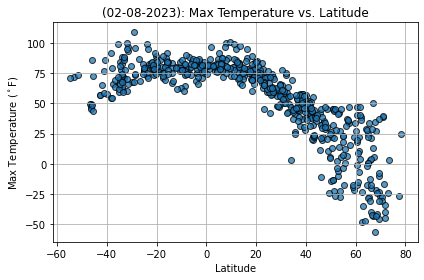

In [15]:
# Build scatter plot for latitude vs. temperature

# create timestampe for API Call
timestamp = datetime.now()
timestamp = timestamp.strftime("%m-%d-%Y")

# assign columns from DataFrame to x and y axis for scatter plot
x = clean_city_df["Lat"]
y = clean_city_df["Max Temp"]

# create scatterplot graph
plt.scatter(x,y,alpha=.75, edgecolors="k")

# add axis labels, chart title, format graph
plt.xlabel("Latitude")
plt.ylabel("Max Temperature ($^\circ$F)")
plt.title(f"({timestamp}): Max Temperature vs. Latitude")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

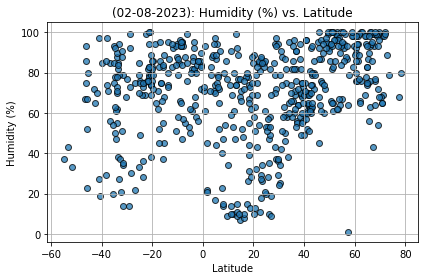

In [16]:
# Build scatter plot for latitude vs. temperature

# assign columns from DataFrame to x and y axis for scatter plot
x = clean_city_df["Lat"]
y = clean_city_df["Humidity"]

# create scatterplot graph
plt.scatter(x,y,alpha=.75, edgecolors="k")

# add axis labels, chart title, format graph
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"({timestamp}): Humidity (%) vs. Latitude")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

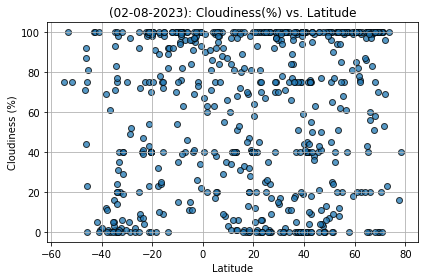

In [17]:
# Build the scatter plots for latitude vs. cloudiness

# assign columns from DataFrame to x and y axis for scatter plot
x = clean_city_df["Lat"]
y = clean_city_df["Cloudiness"]

# create scatterplot graph
plt.scatter(x,y,alpha=.75, edgecolors="k")

# add axis labels, chart title, format graph
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"({timestamp}): Cloudiness(%) vs. Latitude")
plt.grid(True)
plt.tight_layout()

plt.savefig("output_data/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

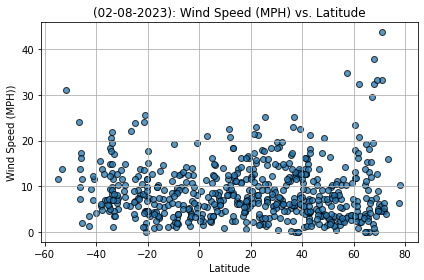

In [18]:
# Build the scatter plots for latitude vs. wind speed

# assign columns from DataFrame to x and y axis for scatter plot
x = clean_city_df["Lat"]
y = clean_city_df["Wind Speed"]

# create scatterplot graph
plt.scatter(x,y,alpha=.75, edgecolors="k")

# add axis labels, chart title, format graph
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH))")
plt.title(f"({timestamp}): Wind Speed (MPH) vs. Latitude")
plt.grid(True)
plt.tight_layout()

plt.savefig("output_data/WindSpeed_vs_Latitude.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    
    # generate regression values
    regress_values = x * slope + intercept
    
    # create string to display linear equation formula
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # set size for plot, graph
    fig1, ax1 = plt.subplots(figsize = (9,5))
    
    # generate scatter plot
    plt.scatter(x, y, edgecolor = "k", marker = "o")
    
    # add line for linear regression
    plt.plot(x, regress_values, "r-")
    
    # add axis labels
    plt.xlabel(x_label, fontsize = 10)
    plt.ylabel(y_label, fontsize = 10)
    
    # add chart title
    plt.title(f"{hemisphere} - Hemisphere: {y_label} vs. {x_label}", fontsize = 10)
    
    # add linear regression annotations
    plt.annotate(line_eq, label_regression, fontsize = 10, color = "red")
    
    # print r-squared value
    print(f"the r-squared value is: {rvalue**2}")
    
    # print correlation coefficient (pearson r)
    correlation = st.pearsonr(x,y)
    print(f"the correlation between factors plotted in the graph is {round(correlation[0],2)}")
    

In [20]:
# Create a DataFrame for cities in the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(clean_city_df.loc[clean_city_df["Lat"]>= 0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Current Weather,Weather Description,Feels Like,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
City_ID,,,,,,,,,,,,,
0,Cayenne,4.9333,-52.3333,Clouds,broken clouds,92.37,84.24,84.24,74,75,16.11,2023-02-08,GF
1,Khatanga,71.9667,102.5000,Clouds,broken clouds,-57.30,-44.70,-44.70,100,69,4.52,2023-02-08,RU
4,Dikson,73.5069,80.5464,Clouds,overcast clouds,-9.18,3.42,3.42,79,100,15.90,2023-02-08,RU
7,Nikolskoye,59.7035,30.7861,Clouds,overcast clouds,27.09,33.39,33.80,93,100,7.11,2023-02-08,RU
10,Aklavik,68.2191,-135.0107,Clouds,broken clouds,-22.00,-22.00,-22.00,76,75,0.00,2023-02-08,CA


In [21]:
# Create a DataFrame for cities in the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(clean_city_df.loc[clean_city_df["Lat"]<0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Current Weather,Weather Description,Feels Like,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
City_ID,,,,,,,,,,,,,
2,Mataura,-46.1927,168.8643,Rain,light rain,46.44,49.48,49.48,93,87,7.29,2023-02-08,NZ
3,Moron,-34.6534,-58.6198,Rain,moderate rain,81.21,80.46,83.95,50,100,14.97,2023-02-08,AR
6,Busselton,-33.6500,115.3333,Clear,clear sky,60.51,60.75,60.75,85,0,11.56,2023-02-08,AU
8,Kamina,-8.7386,24.9906,Clouds,broken clouds,64.76,64.26,64.26,93,76,1.97,2023-02-08,CD
9,Arraial Do Cabo,-22.9661,-42.0278,Clouds,broken clouds,86.70,82.26,82.36,69,75,8.05,2023-02-08,BR


###  Temperature vs. Latitude Linear Regression Plot

the r-squared value is: 0.7524629204079991
the correlation between factors plotted in the graph is -0.87


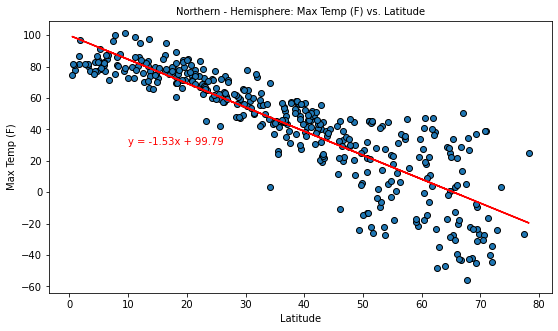

In [22]:
# linear regression of Max Temperature vs. Latitude for Northern Hemisphere

# assign values to arguments to pass into plot_lin_regress paramaters 
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp (F)"
hemisphere = "Northern"
label_regression = (10,30)

# call function
plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression)

# save image
plt.savefig("output_data/N.Hemi-Temp_vs_Lat.png")

# display graph
plt.show()

the r-squared value is: 0.12278435741126337
the correlation between factors plotted in the graph is 0.35


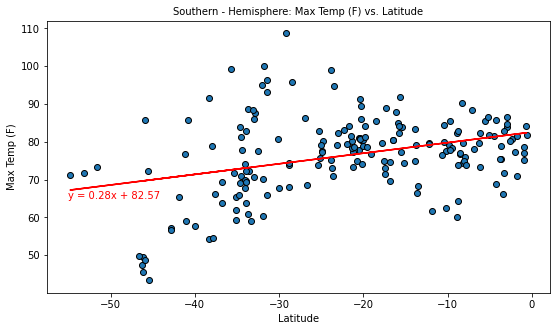

In [30]:
# Linear regression on Southern Hemisphere

# assign values to arguments to pass into plot_lin_regress paramaters 
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp (F)"
hemisphere = "Southern"
label_regression = (-55,65)

# call function
plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression)

# save image
plt.savefig("output_data/S.Hemi-Temp_vs_Lat.png")

# display graph
plt.show()

Northern Hemisphere: Based on the sample cities included in the regression, the model precits that the max temperature at the equator (y-intercept) is 99.79 Farenheit.  For each degree you move from the equator, the tempereature decreases by 1.53 degrees.
The r-squared is 0.75246, which means that ~ 75.246% of the variation in the temperature can be explained by the latitude.

Southern Hemisphere: Based on the sample cities included in the regression, the model precits that the max temperature at the equator (y-intercept) is only 82.57 Farenheit.  Each degree you move closer to the equator results in an increase in temperature of .28 (which is ~ 5x less than the slope in the northern hemisphere model)
The r-squared is 0.1227, which means that only ~ 12.27% of the variation in the temperature can be explained by the latitude.

At a very high level, a city's latitude explains more than half of the variation in temperature, whereas the latitude of a city in the southern hemisphere appears to explain little of the variation, suggesting other factors should be considered when predicting temperature.. 

### Humidity vs. Latitude Linear Regression Plot

the r-squared value is: 0.20170623070573673
the correlation between factors plotted in the graph is 0.45


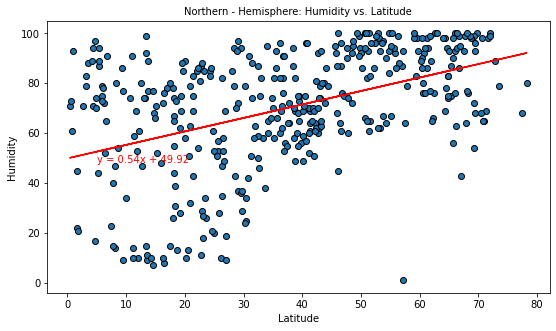

In [24]:
# linear regression of Humidity vs. Latitude for Northern Hemisphere

# assign values to arguments to pass into plot_lin_regress paramaters 
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
hemisphere = "Northern"
label_regression = (5,48)

# call function
plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression)

# save image
plt.savefig("output_data/N.Hemi-Humidity_vs_Lat.png")

# display graph
plt.show()

the r-squared value is: 0.09820435557938302
the correlation between factors plotted in the graph is 0.31


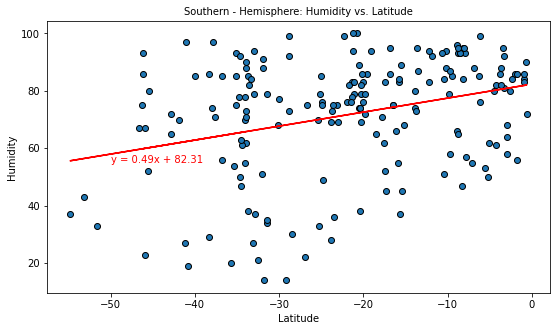

In [31]:
# linear regression of Humidity vs. Latitude for Southern Hemisphere

# assign values to arguments to pass into plot_lin_regress paramaters 
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
hemisphere = "Southern"
label_regression = (-50,55)

# call function
plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression)

# save image
plt.savefig("output_data/S.Hemi-Humidity_vs_Lat.png")

# display graph
plt.show()

For both the northern and southern hemispheres; there does not appear to be meaningful correlation or predictive ability when looking at humidity and latitude.

It would have been more intersting and likely more relavent to analyze humidity and temperature vs latitude or proximity to water and humidity.

Based on the sample size the model for the Northern Hemisphere performs slightly better when attempting to predict humidity, looking at latitude as the independent variable. 

It is important to note that neither model explains a significant portion of the variation in humidity that can be explained by the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

the r-squared value is: 0.01655836660384847
the correlation between factors plotted in the graph is 0.13


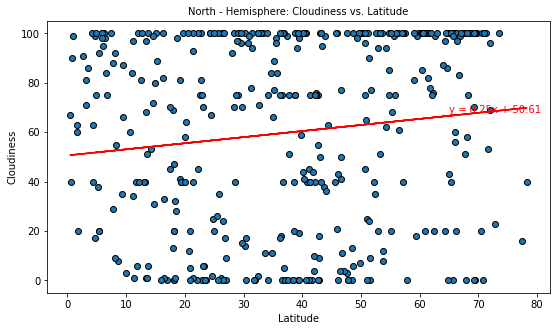

In [26]:
# linear regression of Cloudiness vs. Latitude for Norhern Hemisphere

# assign values to arguments to pass into plot_lin_regress paramaters 
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
hemisphere = "North"
label_regression = (65,68)

# call function
plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression)

# save image
plt.savefig("output_data/N.Hemi-Cloudiness_vs_Lat.png")

# display graph
plt.show()

the r-squared value is: 0.11498473719692628
the correlation between factors plotted in the graph is 0.34


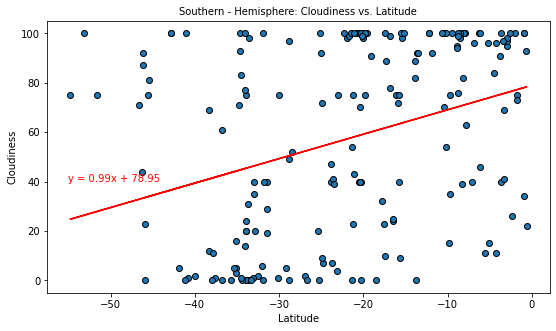

In [27]:
# linear regression of Cloudiness vs. Latitude for Southern Hemisphere

# assign values to arguments to pass into plot_lin_regress paramaters 
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
hemisphere = "Southern"
label_regression = (-55,40)

# call function
plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression)

# save image
plt.savefig("output_data/S.Hemi-Cloudiness_vs_Lat.png")

# display graph
plt.show()

For both the northern and southern hemispheres; there does not appear to be meaningful correlation or predictive ability when looking at cloudiness and latitude. 

It would have been more relavent to analyze humidity and cloudiness or wind speed and cloudiness vs latitude.

Based on the sample size the model for the Southern Hemisphere performs slightly better when attempting to predict cloudiness, looking at latitude as the independent variable. 

It is important to note that neither model explains a significant portion of the variation in cloudiness that can be explained by the latitude.

### Wind Speed vs. Latitude Linear Regression Plot

the r-squared value is: 0.00047833943435204385
the correlation between factors plotted in the graph is 0.02


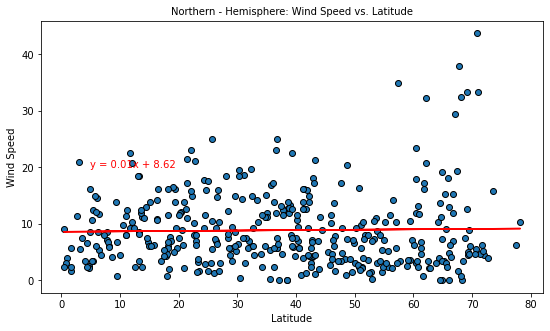

In [28]:
# linear regression of Wind Speed vs. Latitude for Northern Hemisphere

# assign values to arguments to pass into plot_lin_regress paramaters 
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
hemisphere = "Northern"
label_regression = (5,20)

# call function
plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression)

# save image
plt.savefig("output_data/N.Hemi-W.Speed_vs_Lat.png")

# display graph
plt.show()

the r-squared value is: 0.07507456717378518
the correlation between factors plotted in the graph is -0.27


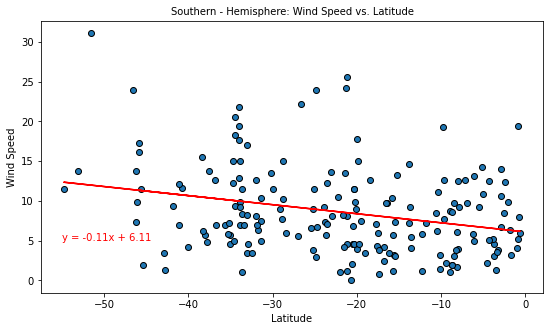

In [29]:
# linear regression of Wind Speed vs. Latitude for Southern Hemisphere

# assign values to arguments to pass into plot_lin_regress paramaters 
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
hemisphere = "Southern"
label_regression = (-55,5)

# call function
plot_lin_regress(x, y, x_label, y_label, hemisphere, label_regression)

# save image
plt.savefig("output_data/S.Hemi-W.Speed_vs_Lat.png")

# display graph
plt.show()

For both the northern and southern hemispheres; there does not appear to be meaningful correlation or predictive ability when looking at windspeed and latitude.

It would have been more relavent to analyze windspeed and temperature, or air pressure and windspeed than vs latitude.

It is important to note that neither model explains a significant portion of the variation in wind speed that can be explained by the latitude.
The correlation coefficient for the northern hemisphere is effectively 0; which indicates that there is no linear relationship between wind speed and latitude.  

The correlation for the southern hemisphere is negative relationship; which can be interpreted as wind speed decreases as latitude increases --- ie it is windier further from the equator 